In [1]:
import json
import pandas as pd
pd.set_option('display.height', 1000)
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
import numpy as np
from numpy import array
from keras.preprocessing.text import one_hot
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers.embeddings import Embedding
from keras.preprocessing.text import Tokenizer
import keras.preprocessing.text as kpt
import keras
import re 

master_df = pd.read_csv("../../data/nutrient/compiled/nutrition_master_df.csv")

with open('../../data/recipe/NDB_NO_tag_dict.json') as f:
    NDB_NO_tag_dict = json.load(f)
    
with open('../../data/recipe/recipe_all.json') as f:
    original_recipe = json.load(f)
    
with open('../../data/recipe/recipe_clean.json') as f:
    recipe_clean = json.load(f)
    
with open('../../data/recipe/recipe_clean_anna.json') as f:
    recipe_clean_anna = json.load(f)
    
with open('../../data/recipe/recipe_clean_maura_v1.json') as f:
    recipe_clean_maura_v1 = json.load(f)

height has been deprecated.



Using TensorFlow backend.


In [6]:
recipe_clean_maura_v1

{'RECIPE_10398': {'NDB_NO_tags': ['"12151"',
   '"19335"',
   '"01077"',
   '"04529"',
   '"01125"',
   '"01053"',
   '"12151"'],
  'calories': '""',
  'carbs': '""',
  'cooktime': '""',
  'fat': '""',
  'fiber': '""',
  'id': '10398',
  'ingredients': ['1.0 cup unsalted shelled pistachios',
   '0.75 cup sugar',
   '2.0 cups milk ',
   '0.5 teaspoon almond extract',
   '4.0 whole egg yolks',
   '1.0 cup whipping cream',
   '0.75 cup unsalted shelled pistachios toasted coarsely'],
  'instructions': ['Finely grind 1 cup pistachios and 1/4 cup sugar in processor. Bring milk and ground pistachio mixture to boil in heavy large saucepan. Remove from heat. Mix in almond extract. Whisk egg yolks and remaining 1/2 cup sugar in medium bowl. Gradually whisk in hot milk mixture. Return custard to saucepan. Cook over low heat until custard thickens and leaves path on back of spoon when finger is drawn across stirring constantly about 10 minutes (do not boil). Strain into large bowl. Chill until col

In [7]:
for i in NDB_NO_tag_dict.keys():
    
    try:
        if '"' not in NDB_NO_tag_dict[i] and NDB_NO_tag_dict[i] != 'np.nan' and NDB_NO_tag_dict[i] != '':
            print(i, NDB_NO_tag_dict[i])
            
            if '"' not in NDB_NO_tag_dict[i]:
                NDB_NO_tag_dict[i] = '"{}"'.format(NDB_NO_tag_dict[i].strip("\t"))
    except:
        print('FAIL', i)

duck fat  04542
ground all spice 02001
sweet dessert wine 14057
canned pumpkin 11424
peppercorns 02030
white bread dough 18014
dried red pepper flakes '02031'
mini rigatoni 20420
raspberry 09302
boneless leg of lamb butterflied 17300
fresh rosemary 02063
hot cherry peppers peppers
blanched whole almonds 12062
shredded red cabbage 11112
2-percent mozzarella cheese 01029
for purging exi
baby bok choy 11116
FAIL pkg martha white chocolate chip muffin mix
reduced-sodium chicken broth 06970
five-spice powder 02031
dried hot red pepper 02031
english muffins 18639
toasted pecans coarsely 12142
small-diced carrots 11124
dark raisins 09299
red radishes 11429
bunch watercress stems 11591


In [13]:
recipe_clean_ALL = {}

for key in recipe_clean.keys():
    if key not in recipe_clean_ALL.keys():
        recipe_clean_ALL[key] = recipe_clean[key]
        recipe_clean_ALL[key]['NDB_NO_tags'] = []
    
for key in recipe_clean_anna.keys():
    if key not in recipe_clean_ALL.keys():
        recipe_clean_ALL[key] = recipe_clean_anna[key]
        recipe_clean_ALL[key]['NDB_NO_tags'] = []
    
for key in recipe_clean_maura_v1.keys():
    if key not in recipe_clean_ALL.keys():
        recipe_clean_ALL[key] = recipe_clean_maura_v1[key]
        recipe_clean_ALL[key]['NDB_NO_tags'] = []
        


In [14]:
itr = 0

original_text = []
nbd_tag = []
for key in recipe_clean_ALL.keys():
    
    for i in recipe_clean_ALL[key]['ingredients']:
        
        ingredient_split = i.split(" ")
        ingredient_split = list(filter(None, ingredient_split))
        ingredient_new = " ".join(ingredient_split[2:])
        
        try:
            recipe_clean_ALL[key]['NDB_NO_tags'].append(NDB_NO_tag_dict[ingredient_new])
        except:
            recipe_clean_ALL[key]['NDB_NO_tags'].append('')
    
    
    if len(recipe_clean_ALL[key]['NDB_NO_tags']) == len(original_recipe[key]['ingredients']):       
        itr_2 = 0
        while itr_2 < len(recipe_clean_ALL[key]['NDB_NO_tags']):
            original_text.append(original_recipe[key]['ingredients'][itr_2])
            nbd_tag.append(recipe_clean_ALL[key]['NDB_NO_tags'][itr_2])
            itr_2 += 1
        
        itr += 1

In [16]:

with open('/root/w210_capstone/data/recipe/recipe_clean_USE.json', 'w') as f:
    json.dump(recipe_clean_ALL, f)

In [138]:
units_of_food_recipe = ["cups", "cup", "c.", "c", 
                        "fl. oz.", "fl oz", "fluid ounce", "fluid ounces",
                        "gal", "gal.", "gallon", "gallons",
                        "oz", "oz.", "ounce", "ounces", "ouncs",
                        "pt", "pt.", "pint", "pints",
                        "lb", "lb.", "pound", "pounds",
                        "qt", "qt.", "qts", "qts.", "quart", "quarts",
                        "tbsp.", "tbsp", "T", "T.", "tablespoon", "tablespoons", "tbs.", "tbs",
                        "tsp.", "tsp", "t", "t.", "teaspoon", "teaspoons",
                        "g", "g.", "gr", "gr.", "gram", "grams", "gramme", "grammes",
                        "kg", "kg.", "kilogram", "kilograms", "kilogramme", "kilogrammes",
                        "l", "l.", "liter", "liters", "litre", "litres",
                        "mg", "mg.", "milligram", "milligrams", "milligramme", "milligrammes",
                        "ml", "ml.", "milliliter", "milliliters", "millilitre", "millilitres",
                        "pinch", "pinches", "dash", "dashes", "touch", "touches", "handful", "handfuls",
                        "stick", "sticks",
                        "cans", "can",
                        "to taste",
                        "scoop", "scoops",
                        "dollop", "dollops",
                        "sprig", "sprigs",
                       "recipe",
                       "garnish", "garnished",
                       "sprinkle", "spinkled",
                       "slices",
                       "serving", "servings",
                       "ribs", "rib", "stalk",
                       "inch", "inches", "in.",
                       "drizzle", "drizzled",
                       "to taste"]

food_size = ["small", "medium",
              "large", "about"]

food_format = ["slice", "sliced",
              "dice", "diced",
              "peel", "peeled",
              "chop", "chopped",
              "julienne", "julienned",
              "trim", "trimmed",
              "sift", "sifted",
              "freshly",
              "fine", "finely",
              "drain", "drained",
              "super thinly", "thin", "thinly",
              "grate", "grated",
              "seeded",
              "rinse", "rinsed",
              "smash", "smashed",
              "membrane", "removed",
              "cleaned",
              "mince", "minced",
              "crush", "crushed",
              "about", "around",
              '<hr>']


def is_number(s):
    try:
        float(s)
        return True
    except ValueError:
        return False

In [139]:
filtered_original_text = []
for original in original_text:
    original = re.sub(r'\s*(\d+|[./+*-])', '', original)
    original_split = original.split(" ")
    remove_list = list(set(original).symmetric_difference(units_of_food_recipe))
    
#     for i in units_of_food_recipe:
#         if i in original_split:
#           original_split.remove(i)

    keep_list = []
    for i in original_split:
        if i not in food_size and i not in units_of_food_recipe:
            keep_list.append(i)
    
#     original_split = filter(None, original_split)
    original_split = filter(None, keep_list)
    new = " ".join(original_split)
    
    
    filtered_original_text.append(new)

In [140]:
# print(master_df[master_df['NDB_NO'] == nbd_tag_temp][['Description']].get_values()[0][0])

# "\"{}\"".format(

In [141]:
nlp_df = pd.DataFrame([original_text, filtered_original_text, nbd_tag]).transpose()
nlp_df.columns = ['original_text', 'filtered_text','NBD_tag']
nlp_df = nlp_df[nlp_df['NBD_tag'] != 'np.nan']
nlp_df['NBD_tag'].replace('', np.nan, inplace=True)
nlp_df.dropna(subset=['NBD_tag'], inplace=True)
nlp_df['filtered_text'] = nlp_df['filtered_text'].str.lower()
nlp_df = nlp_df.reset_index()
nlp_df.to_csv('../../data/nutrient/compiled/nlp_df.csv')
nlp_df['NBD_tag'] = nlp_df['NBD_tag'].astype(str)

original_text = []
NBD_tag_list = []
Description_list = []


itr = 0
while itr < len(nlp_df):
    
    
    try:
        nbd_tag_temp = nlp_df.loc[itr, 'NBD_tag'].strip()
        temp_original_text = nlp_df.loc[itr, 'original_text']
        temp_nutrition = master_df[master_df['NDB_NO'] ==  nbd_tag_temp][['Description']].get_values()[0][0]
        
        
        NBD_tag_list.append(nbd_tag_temp)
        original_text.append(temp_original_text)
        Description_list.append(temp_nutrition)
        
        
    except:
        print(itr, "FAILED")
    
    itr += 1
    
    
#     temp_orig_food = master_df[master_df['NDB_NO'] ==  "\"{}\"".format(temp_ndb_id.strip('"'))][['Description']].get_values()[0][0]    
#     nlp_df.loc[itr, 'Description'] = temp_orig_food
#     itr += 1
# nlp_df = nlp_df.drop_duplicates(subset='filtered_text')

174 FAILED
5196 FAILED


In [142]:
print(len(original_text))
print(len(NBD_tag_list))
print(len(Description_list))

5224
5224
5224


In [144]:
df_output = pd.DataFrame([original_text, NBD_tag_list, Description_list]).transpose()

print(df_output.shape)

df_output.columns = ['original_text', 'NBD_ID', 'Description']
df_output.to_csv("../../data/nutrient/compiled/train_nn_df.csv")

(5224, 3)


In [12]:
from sklearn.model_selection import train_test_split

NBD_tag_unique = nlp_df['NBD_tag'].unique()
NBD_tag_unique_unique_dict = {}

itr = 0
while itr < len(NBD_tag_unique):
    NBD_tag_unique_unique_dict[NBD_tag_unique[itr]] = itr + 1
    itr += 1
    
nn_label_list = []
for i in nlp_df['NBD_tag'].values.tolist():
    nn_label_list.append(NBD_tag_unique_unique_dict[i])
    
    
# only work with the 3000 most popular words found in our dataset
max_words = 3000

# create a new Tokenizer
tokenizer = Tokenizer(num_words=max_words)
# feed our tweets to the Tokenizer
tokenizer.fit_on_texts(nlp_df['filtered_text'].tolist())   


X_train_initial, X_test, y_train_initial, y_test = train_test_split(nlp_df['filtered_text'], nn_label_list, train_size=0.7)
X_train, X_dev, y_train, y_dev = train_test_split(nlp_df['filtered_text'], nn_label_list, train_size=0.8)

/root/anaconda/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [149]:
with open('/root/w210_capstone/data/models/nn_category_map.json', 'w') as outfile:
    json.dump(NBD_tag_unique_unique_dict, outfile)

{'\t"01023"': 378,
 '\t"09159"': 77,
 '\t"12695"': 113,
 '"01001"': 57,
 '"01004"': 324,
 '"01017"': 8,
 '"01019"': 103,
 '"01020"': 645,
 '"01022"': 634,
 '"01023"': 551,
 '"01023"]': 655,
 '"01025"': 129,
 '"01026"': 32,
 '"01028"': 406,
 '"01029"': 442,
 '"01030"': 304,
 '"01033"': 20,
 '"01035"': 256,
 '"01036"': 172,
 '"01040"': 238,
 '"01043"': 230,
 '"01049"': 131,
 '"01053"': 53,
 '"01054"': 234,
 '"01056"': 215,
 '"01057"': 490,
 '"01071"': 582,
 '"01077"': 37,
 '"01082"': 592,
 '"01085"': 363,
 '"01095"': 144,
 '"01116"': 548,
 '"01117"': 261,
 '"01123"': 35,
 '"01124"': 1,
 '"01125"': 120,
 '"01129"': 626,
 '"01145"': 40,
 '"01153"': 632,
 '"01159"': 188,
 '"01168"': 648,
 '"01174"': 646,
 '"01180"': 365,
 '"01225"': 608,
 '"01230"': 62,
 '"01256"': 344,
 '"01267"': 514,
 '"01270"': 264,
 '"01287"': 250,
 '"01295"': 579,
 '"02001"': 246,
 '"02002"': 459,
 '"02003"': 376,
 '"02004"': 187,
 '"02005"': 499,
 '"02006"': 149,
 '"02007"': 509,
 '"02009"': 94,
 '"02010"': 61,
 '"02

In [13]:
dictionary = tokenizer.word_index
# Let's save this out so we can use it later
with open('dictionary.json', 'w') as dictionary_file:
    json.dump(dictionary, dictionary_file)
    
def convert_text_to_index_array(text):
    # one really important thing that `text_to_word_sequence` does
    # is make all texts the same length -- in this case, the length
    # of the longest text in the set.
    
    word_list = []
    
    for word in kpt.text_to_word_sequence(text):
        try:
            word_list.append(dictionary[word])
            
        except:
            print("Word:", word, " not in index...SKIP")
    
#     return [dictionary[word] for word in kpt.text_to_word_sequence(text)]
    return word_list

allWordIndices = []
# for each tweet, change each token to its ID in the Tokenizer's word_index
for text in X_train.tolist():
    wordIndices = convert_text_to_index_array(text)    
    allWordIndices.append(wordIndices)

# now we have a list of all tweets converted to index arrays.
# cast as an array for future usage.
allWordIndices = np.asarray(allWordIndices)

# create one-hot matrices out of the indexed tweets
train_x = tokenizer.sequences_to_matrix(allWordIndices, mode='binary')

train_y = keras.utils.to_categorical(np.asarray(y_train))

In [14]:
allWordIndicesTEST = []
# for each tweet, change each token to its ID in the Tokenizer's word_index
for text in X_test.tolist():
    wordIndicesTEST = convert_text_to_index_array(text)    
    allWordIndicesTEST.append(wordIndicesTEST)

# now we have a list of all tweets converted to index arrays.
# cast as an array for future usage.
allWordIndicesTEST = np.asarray(allWordIndicesTEST)

# create one-hot matrices out of the indexed tweets
test_x = tokenizer.sequences_to_matrix(allWordIndicesTEST, mode='binary')
test_y = keras.utils.to_categorical(np.asarray(y_test))

if train_y.shape[1] != test_y.shape[1]:
    new_test_y_list = []
    additional_zero = train_y.shape[1] - test_y.shape[1]
    for i in range(test_y.shape[0]):
        new_test_y_list.append(test_y[i].tolist() + [0]*additional_zero)
    
    new_test_y_array = np.asarray(new_test_y_list)
    test_y = new_test_y_array.reshape(test_y.shape[0], train_y.shape[1])
    

    
allWordIndicesDEV = []
# for each tweet, change each token to its ID in the Tokenizer's word_index
for text in X_dev.tolist():
    wordIndicesDEV = convert_text_to_index_array(text)    
    allWordIndicesDEV.append(wordIndicesDEV)

# now we have a list of all tweets converted to index arrays.
# cast as an array for future usage.
allWordIndicesDEV = np.asarray(allWordIndicesDEV)

# create one-hot matrices out of the indexed tweets
dev_x = tokenizer.sequences_to_matrix(allWordIndicesDEV, mode='binary')
dev_y = keras.utils.to_categorical(np.asarray(y_dev))


if train_y.shape[1] != dev_y.shape[1]:
    new_dev_y_list = []
    additional_zero = train_y.shape[1] - dev_y.shape[1]
    for i in range(dev_y.shape[0]):
        new_dev_y_list.append(dev_y[i].tolist() + [0]*additional_zero)
    
    new_dev_y_array = np.asarray(new_dev_y_list)
    dev_y = new_dev_y_array.reshape(dev_y.shape[0], train_y.shape[1])

In [15]:
print(train_y.shape)
print(test_y.shape)
print(dev_y.shape)

(2276, 656)
(854, 656)
(569, 656)


In [16]:
import pickle

# saving
with open('tokenizer.pickle', 'wb') as handle:
    pickle.dump(tokenizer, handle, protocol=pickle.HIGHEST_PROTOCOL)

# loading
# with open('tokenizer.pickle', 'rb') as handle:
#     tokenizer = pickle.load(handle)

In [17]:
output_classification =  train_y.shape[-1]

In [18]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation

model = Sequential()
model.add(Dense(512, input_shape=(max_words,), activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(256, activation='sigmoid'))
model.add(Dropout(0.5))
model.add(Dense(output_classification, activation='softmax'))

In [19]:
model.compile(loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy'])

In [20]:
history = model.fit(train_x, train_y,
  batch_size=32,
  epochs=50,
  verbose=1,
  validation_split=0.1,
  shuffle=True,
  validation_data=(dev_x, dev_y))

Train on 2276 samples, validate on 569 samples
Epoch 1/50
2276/2276 [==============================] - 3s 1ms/step - loss: 6.1941 - acc: 0.0264 - val_loss: 6.0756 - val_acc: 0.0334
Epoch 2/50
2276/2276 [==============================] - 3s 1ms/step - loss: 5.6827 - acc: 0.0606 - val_loss: 5.8563 - val_acc: 0.0475
Epoch 3/50
2276/2276 [==============================] - 3s 1ms/step - loss: 5.3403 - acc: 0.0962 - val_loss: 5.6346 - val_acc: 0.0668
Epoch 4/50
2276/2276 [==============================] - 3s 1ms/step - loss: 5.0201 - acc: 0.1384 - val_loss: 5.4520 - val_acc: 0.1353
Epoch 5/50
2276/2276 [==============================] - 2s 1ms/step - loss: 4.7280 - acc: 0.1894 - val_loss: 5.2461 - val_acc: 0.2004
Epoch 6/50
2276/2276 [==============================] - 2s 1ms/step - loss: 4.4318 - acc: 0.2482 - val_loss: 5.0257 - val_acc: 0.2619
Epoch 7/50
2276/2276 [==============================] - 2s 1ms/step - loss: 4.1159 - acc: 0.3018 - val_loss: 4.8195 - val_acc: 0.2777
Epoch 8/50
2276

In [21]:
model_json = model.to_json()
with open('model_simple_nn.json', 'w') as json_file:
    json_file.write(model_json)

model.save_weights('model_simple_nn_WEIGHTS.h5')

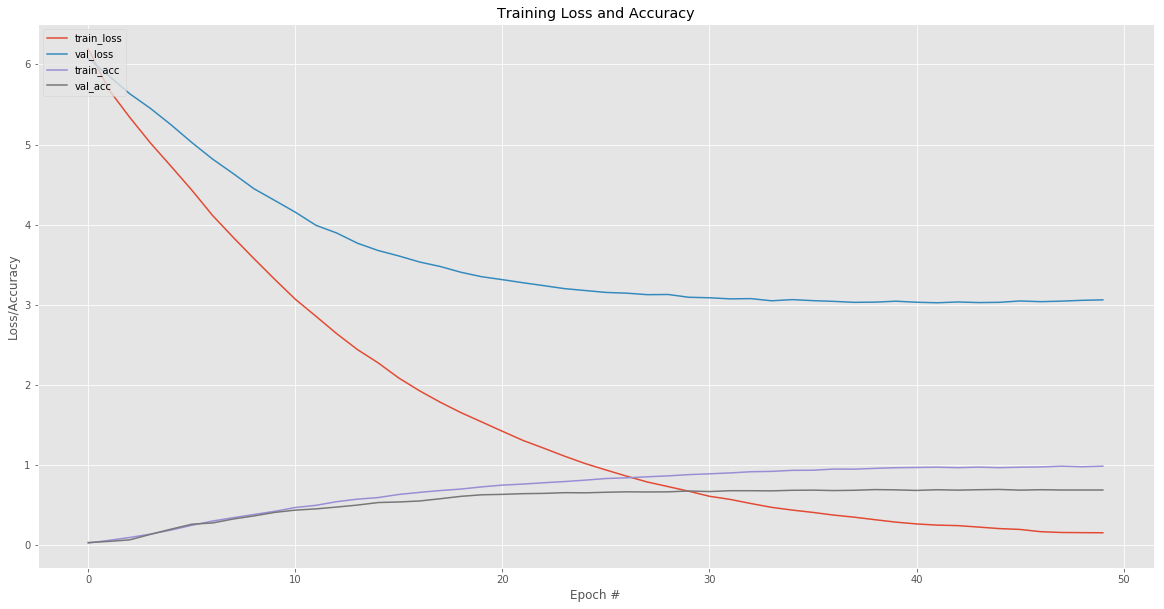

In [22]:
import matplotlib.pyplot as plt
%matplotlib inline

# plot the training loss and accuracy
plt.style.use("ggplot")
plt.figure(figsize=(20, 10))
N = 50
plt.plot(np.arange(0, N), history.history["loss"], label="train_loss")
plt.plot(np.arange(0, N), history.history["val_loss"], label="val_loss")
plt.plot(np.arange(0, N), history.history["acc"], label="train_acc")
plt.plot(np.arange(0, N), history.history["val_acc"], label="val_acc")
plt.title("Training Loss and Accuracy")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend(loc="upper left")

egg, whole, raw, fresh 0.99354
egg, whole, cooked, hard-boiled 0.00138894
egg, white, raw, fresh 0.000990835


In [24]:
y_predict_array = model.predict(test_x)
y_predict_int_list = []
itr = 0
while itr < len(y_predict_array):
    y_predict_int_list.append(y_predict_array[itr].argmax())
    itr += 1
    
y_predict_list = []
for i in y_predict_int_list:
    for key in NBD_tag_unique_unique_dict.keys():
        if NBD_tag_unique_unique_dict[key] == i:
            y_predict_list.append(key)
            
test_y_raw_list = []
for i in y_test:   
    for key in NBD_tag_unique_unique_dict.keys():        
        if NBD_tag_unique_unique_dict[key] == i:
            test_y_raw_list.append(key)

output_df = pd.DataFrame([y_predict_list, test_y_raw_list]).transpose()
output_df.columns = ["y_predict_list", "y_test"]
output_df['Description_predict'] = ''
output_df['Description_test'] = ''

output_df

# itr = 0
# while itr < len(output_df):
        
#     try:
#         output_df.loc[itr, 'Description_predict'] = master_df[master_df['NDB_NO'] == "\"{}\"".format(output_df.loc[itr, 'y_predict_list'].strip('"'))]['Description'].get_values()[0]
#         output_df.loc[itr, 'Description_test'] = master_df[master_df['NDB_NO'] == "\"{}\"".format(output_df.loc[itr, 'y_test'].strip('"'))]['Description'].get_values()[0]

#     except:
        
#         print itr,"FAILED"
        
#     itr += 1
        
        
# output_df

,y_predict_list,y_test,Description_predict,Description_test
0,"""11354""","""11354""",,
1,"""20082""","""20082""",,
2,"""11124""","""11124""",,
3,"""12155""","""09176""",,
4,"""11216""","""11216""",,
5,"""11333""","""11333""",,
6,"""16167""","""16167""",,
7,"""02006""","""02006""",,
8,"""11819""","""11819""",,
9,"""11312""","""11312""",,


In [25]:
(output_df['y_predict_list'] == output_df['y_test']).mean()

0.92740046838407497